# Planning a factory site
Dinoco, a multinational firm in the automobile sector, is deciding on whether to build an assembly plant in Brazil or in Mississipi (USA). The cost to build this plant in Brazil is 10 million euros and the cost of building the plant in Mississippi is 20 million. However, if the firm builds the plant in Brazil and local demand drops over the following 5 years, the project will be stopped and the firm will lose 10M€ (and it will still have to build a plant in Mississippi). A priori, Dinoco believes that the probability of demand for cars dropping in Brazil over the following 5 years is 20%. For 1M€, Dinoco can hire a market research firm to analyse demand for cars in Brazil, which will indicate whether demand for cars will drop or not.
The market research firm’s record indicates that his record shows that they are able to predict the occurrence of a drop in demand with a 95% success rate, and 90% when the demand does not drop.

**a.** Draw the decision tree.

**b.** Solve the tree and find the best alternative for Dinoco.

**c.** Calculate the Imperfect Information Value and the Perfect Information Value associated to the market research (demand in Brazil)

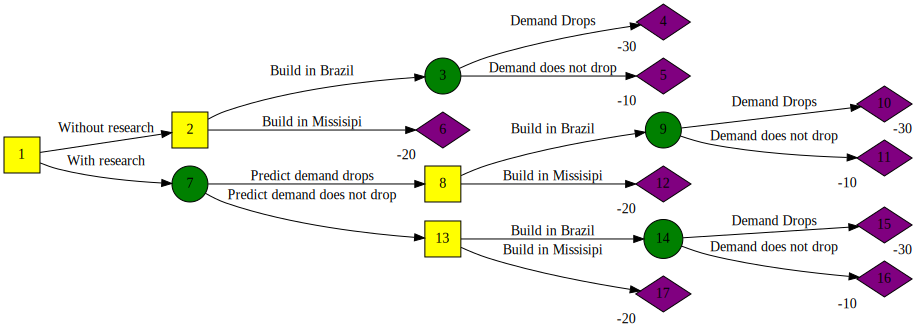

In [1]:
from graphviz import Digraph
# Create Digraph object
din = Digraph(format='png')
din.graph_attr['rankdir'] = 'LR'

# Add root node
din.node('1', shape='square', style="filled", fillcolor='yellow')

# First branch nodes
din.node('2', shape='square', style="filled",  fillcolor='yellow')

din.node('3', shape='circle', style='filled', fillcolor='green')

din.node('4', xlabel='-30', shape='diamond', style='filled', fillcolor='purple')

din.node('5', xlabel='-10', shape='diamond', style='filled', fillcolor='purple')

din.node('6', xlabel='-20', shape='diamond', style='filled', fillcolor='purple')

din.edge('1', '2', 'Without research')

din.edge('2', '3', 'Build in Brazil')

din.edge('2', '6', 'Build in Missisipi')

din.edge('3', '4', 'Demand Drops')

din.edge('3', '5', 'Demand does not drop')

din.node('7', shape='circle', style='filled', fillcolor='green')

din.edge('1', '7', 'With research')

# Second branch
din.node('8', shape='square', style="filled", fillcolor='yellow')
din.edge('7', '8', 'Predict demand drops')

# Second branch nodes
din.node('9', shape='circle', style='filled', fillcolor='green')

din.node('10', xlabel='-30', shape='diamond', style='filled', fillcolor='purple')

din.node('11', xlabel='-10', shape='diamond', style='filled', fillcolor='purple')

din.node('12', xlabel='-20', shape='diamond', style='filled', fillcolor='purple')


din.edge('8', '9', 'Build in Brazil')

din.edge('8', '12', 'Build in Missisipi')

din.edge('9', '10', 'Demand Drops')

din.edge('9', '11', 'Demand does not drop')

# Third branch
din.node('13', shape='square', style="filled", fillcolor='yellow')

din.edge('7', '13', 'Predict demand does not drop')

# Third branch nodes
din.node('14', shape='circle', style='filled', fillcolor='green')

din.node('15', xlabel='-30', shape='diamond', style='filled', fillcolor='purple')

din.node('16', xlabel='-10', shape='diamond', style='filled', fillcolor='purple')

din.node('17', xlabel='-20', shape='diamond', style='filled', fillcolor='purple')


din.edge('13', '14', 'Build in Brazil')

din.edge('13', '17', 'Build in Missisipi')

din.edge('14', '15', 'Demand Drops')

din.edge('14', '16', 'Demand does not drop')

din

The initial (a priori) probabilities are:

Probability that demand drops: 
$P(D_D) = 0.2$

Probability that demand does not drop:
$P(D_{ND}) = 0.8$

The conditional probabilities with additional information are:

- Record of predicted *market drops* events:

$P(PD_D|D_D) = 0.95$

$P(PD_D|D_{ND}) = 0.05$

Record of predicted *market does not drop* events:

$P(PD_{ND}|D_D) = 0.1$

$P(PD_{ND}|D_{ND}) = 0.9$

With these, the probabilities of occurence of imperfect information are: 

$P(PD_D) = P(D_D)·P(PD_D|D_D)+P(D_{ND})·P(PD_D|D_{ND}) = 0.27$

$P(PD_{ND}) = P(D_D)·P(PD_{ND}|D_D)+P(D_{ND})·P(PD_{ND}|D_{ND})=0.73$

Now with these data, we can calculate the a posteriori probabilities using the Bayes Theorem:

$P(D_D|PD_D) = \frac{P(D_D)·P(PD_D|D_D)}{P(PD_D)}=0.7037$

$P(D_{ND}|PD_D) = \frac{P(D_{ND})·P(PD_D|D_{ND})}{P(PD_D)}=0.2963$

$P(D_D|PD_{ND}) = \frac{P(D_D)·P(PD_{ND}|D_D)}{P(PD_{ND})}=0.0137$

$P(D_{ND}|PD_{ND}) = \frac{P(D_{ND})·P(PD_{ND}|D_D)}{P(PD_{ND})}=0.9863$

Now, entering this information in the graph, we can calculate the values of the different nodes:



$V_3 = P(D_D)·V_4+P(D_{ND})·V_5 = 0.2·(-30)+0.8·(-10)=-14$
$V_2 = \max(V_3, V_6) = -14$

$V_9 = P(D_D|PD_D)·V_{10}+P(D_{ND}|PD_D)·V_{11} = 0.7037·(-30)+0.2963·(-10)=-24.074$
$V_8 = \max(V_9,V_{12}) = -20$
$V_{14} = P(D_D|PD_{ND})·V_{15}+P(D_{ND}|PD_{ND})·V_{16} = 0.0137·(-30)+0.9863·(-10)=-10.274$
$V_{13} = \max(V_{14}, V_{17}) = -10.274$

$V_7 = P(PD_D)·V_9+P(PD_{ND})·V_{13} = -12.9$

$V_1 = \max(V_2, V_7-1) = -13.9 $

According to the decision tree, it is recommended to hire the consultant. The expected cost is -13.9M€. If the report predicts a drop in the demand, the best alternative is to build the plant in Missisipi and if the report does not predict a drop, in Brazil.



The Expected Return with Perfect Information is:

ERPI = 0.2·(-20)+0.8·(-10) = -12

And the Perfect Information Value = 

PIV = ERPI - (-13.9) = -12 -- 13.9 = 1.9 \\$
